# Berk Çelikten 201001009 
Enver Küçükkülahlı

In [ ]:

import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_ 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import Decision Tree Regressor, Decision TreeClassifier 
from sklearn.neighbors import KNeighbors Regressor, KNeighborsClassifier
from sklearn. ensemble import BaggingRegressor
from sklearn. neural_network import MLPRegressor 
from sklearn. ensemble import RandomForestRegressor
from sklearn.ensemble import Gradient BoostingRegressor 
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler 
from skompiler import skompile
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor 
from warnings import filterwarnings filterwarnings('ignore')
from datetime import datetime

In [87]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## CSV'yi okur
df= pd.read_csv('movies.csv')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [89]:
df.head() 
#DataFrame'in ilk 5 satırını döndürür. 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [90]:
df.tail()
# fonksiyonu DataFrame'in son 5 satırını döndürür

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [91]:
df.describe().T 
# fonksiyonunun çıktısının transpozunu (transpose) alır.

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.0,2000.0,2010.0,2.020000e+03
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.0,33000.0,93000.0,2.400000e+06
budget,5497.0,3.558988e+07,4.145730e+07,3000.0,10000000.0,20500000.0,45000000.0,3.560000e+08
gross,7479.0,7.850054e+07,1.657251e+08,309.0,4532055.5,20205757.0,76016691.5,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.0,104.0,116.0,3.660000e+02


In [92]:
df.dtypes
# veri türlerini verir

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [93]:



# 'score' sütununda NaN değerleri düşürüp 'score' sütununa göre sıralama
sorted_df = df.dropna(subset=['score']).sort_values(by='score')

# Sonuçları yazdırma
print(sorted_df)

                                               name rating      genre  year  \
5354                        The Hottie & the Nottie  PG-13     Comedy  2008   
4594                   Superbabies: Baby Geniuses 2     PG     Comedy  2004   
5306                                 Disaster Movie  PG-13     Comedy  2008   
4412                           From Justin to Kelly     PG     Comedy  2003   
4342                              House of the Dead      R     Action  2003   
...                                             ...    ...        ...   ...   
2444                                   Pulp Fiction      R      Crime  1994   
2247                               Schindler's List      R  Biography  1993   
4245  The Lord of the Rings: The Return of the King  PG-13     Action  2003   
5243                                The Dark Knight  PG-13     Action  2008   
2443                       The Shawshank Redemption      R      Drama  1994   

                               released  score     

In [94]:


# NaN değerleri içeren satırları kaldırır
df = df.dropna(subset=['score'])

# Eğer orijinal DataFrame üzerinde değişiklik yapmak istemiyorsam, inplace parametresini True olarak ayarlayabilirim:
# df.dropna(subset=['score'], inplace=True)

# Kaldırılan satırların indekslerini yeniden sıralar
df.reset_index(drop=True)

# İşlenmiş DataFrame'i görüntüler
print(df)

                                                name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7660                                Aloha Surf Hotel    NaN     Comedy  2020   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released 

In [95]:
df.sort_values('score')
#score sıralaması

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5354,The Hottie & the Nottie,PG-13,Comedy,2008,"February 21, 2008 (Russia)",1.9,36000.0,Tom Putnam,Heidi Ferrer,Paris Hilton,United States,NaN,1.596232e+06,Purple Pictures,91.0
4594,Superbabies: Baby Geniuses 2,PG,Comedy,2004,"August 27, 2004 (United States)",1.9,30000.0,Bob Clark,Robert Grasmere,Jon Voight,Germany,20000000.0,9.448644e+06,ApolloMedia Distribution,88.0
5306,Disaster Movie,PG-13,Comedy,2008,"August 29, 2008 (United States)",1.9,88000.0,Jason Friedberg,Jason Friedberg,Carmen Electra,United States,20000000.0,3.481682e+07,Lionsgate,87.0
4412,From Justin to Kelly,PG,Comedy,2003,"June 20, 2003 (United States)",2.1,25000.0,Robert Iscove,Kim Fuller,Kelly Clarkson,United States,12000000.0,4.928883e+06,19 Entertainment,81.0
4342,House of the Dead,R,Action,2003,"October 10, 2003 (United States)",2.1,36000.0,Uwe Boll,Mark A. Altman,Jonathan Cherry,Germany,12000000.0,1.381818e+07,Boll Kino Beteiligungs GmbH & Co. KG,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0


In [96]:
df[df['year']>2000]
#200den sonra çıkmış olan filmler

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3843,Harry Potter and the Sorcerer's Stone,PG,Adventure,2001,"November 16, 2001 (United States)",7.6,685000.0,Chris Columbus,J.K. Rowling,Daniel Radcliffe,United Kingdom,125000000.0,1.006968e+09,Warner Bros.,152.0
3844,The Fast and the Furious,PG-13,Action,2001,"June 22, 2001 (United States)",6.8,362000.0,Rob Cohen,Ken Li,Vin Diesel,United States,38000000.0,2.073055e+08,Universal Pictures,106.0
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000.0,8.976901e+08,New Line Cinema,178.0
3846,Legally Blonde,PG-13,Comedy,2001,"July 13, 2001 (United States)",6.3,195000.0,Robert Luketic,Amanda Brown,Reese Witherspoon,United States,18000000.0,1.417747e+08,Metro-Goldwyn-Mayer (MGM),96.0
3847,Mulholland Dr.,R,Drama,2001,"October 19, 2001 (United States)",7.9,331000.0,David Lynch,David Lynch,Naomi Watts,France,15000000.0,2.026365e+07,Les Films Alain Sarde,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


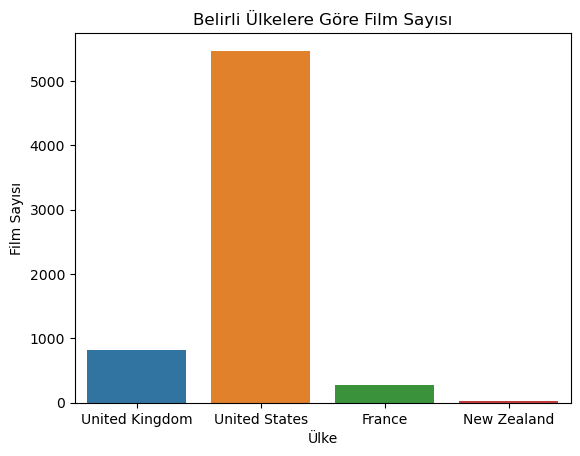

In [97]:
# hangi ülkenin filmi
selected_countries = ['United States', 'United Kingdom', 'France', 'New Zealand']

sns.countplot(x='country', data=df)

df_filtered = df[df['country'].isin(selected_countries)]

# Filtrelenmiş veri üzerinde countplot'u oluşturur
sns.countplot(x='country', data=df_filtered)
plt.xlabel('Ülke')
plt.ylabel('Film Sayısı')
plt.title('Belirli Ülkelere Göre Film Sayısı')
plt.show()

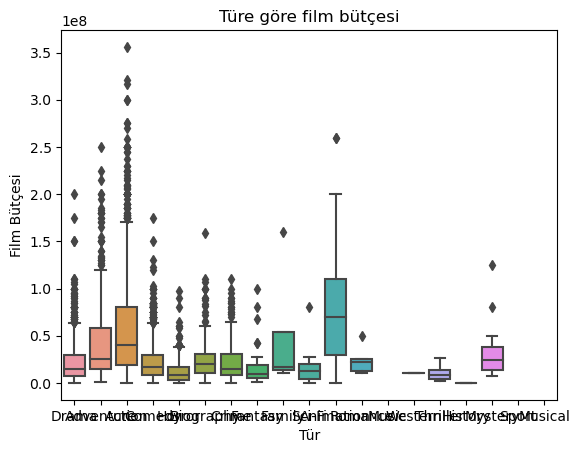

In [98]:
#genre ye göre budget
#türe göre film bütçesi

sns.boxplot(x='genre',y='budget',data=df)
plt.xlabel('Tür')
plt.ylabel('Film Bütçesi')
plt.title('Türe göre film bütçesi')
plt.show()

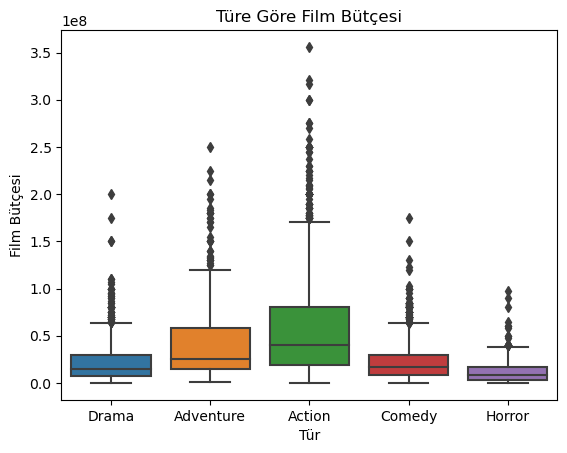

In [99]:
# Belirli türlerdeki filmleri filtreler
selected_genres = ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror']
df_filtered = df[df['genre'].isin(selected_genres)]

# Filtrelenmiş veri üzerinde boxplot'u oluşturur
sns.boxplot(x='genre', y='budget', data=df_filtered)
plt.xlabel('Tür')
plt.ylabel('Film Bütçesi')
plt.title('Türe Göre Film Bütçesi')
plt.show()

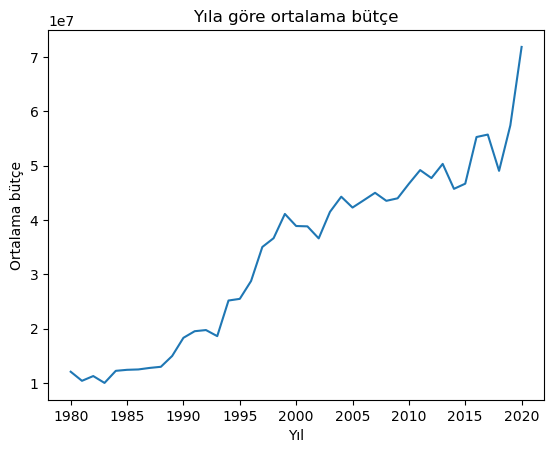

In [100]:
#Yıllara göre ortalama bütçe
mean_budget_year=df.groupby('year')['budget'].mean()
mean_budget_year.plot()
plt.xlabel('Yıl')
plt.ylabel('Ortalama bütçe')
plt.title('Yıla göre ortalama bütçe')
plt.show()

In [101]:
#ülkelerin filmlere harcadığı bütçe
mean_score_by_country = df.groupby('country')['score'].mean().sort_values()

Text(0.5, 1.0, 'En İyi Film Scorelarında 5 Ülkenin Değerleri')

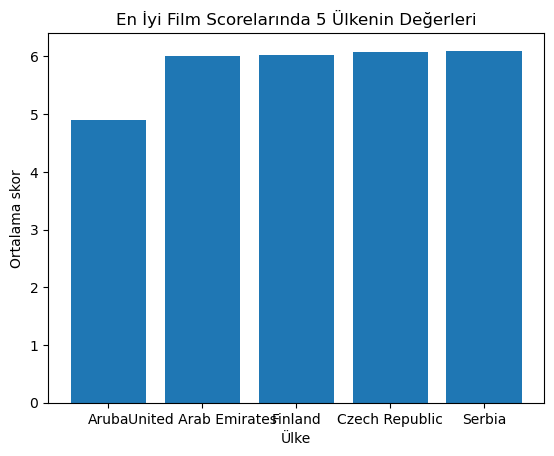

In [102]:
#En iyi film scorelarında 5 ülke

top_5_countries = mean_score_by_country.head(5)
plt.bar(top_5_countries.index, top_5_countries.values)
plt.xlabel('Ülke')
plt.ylabel('Ortalama skor')
plt.title('En İyi Film Scorelarında 5 Ülkenin Değerleri')

Text(0.5, 1.0, 'En İyi Film Scorelarında 3 Ülkenin Değerleri')

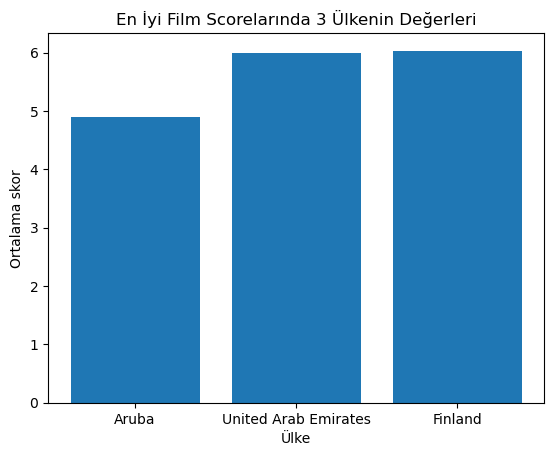

In [103]:
#En iyi film scorelarında 3 ülke

top_5_countries = mean_score_by_country.head(3)
plt.bar(top_5_countries.index, top_5_countries.values)
plt.xlabel('Ülke')
plt.ylabel('Ortalama skor')
plt.title('En İyi Film Scorelarında 3 Ülkenin Değerleri')

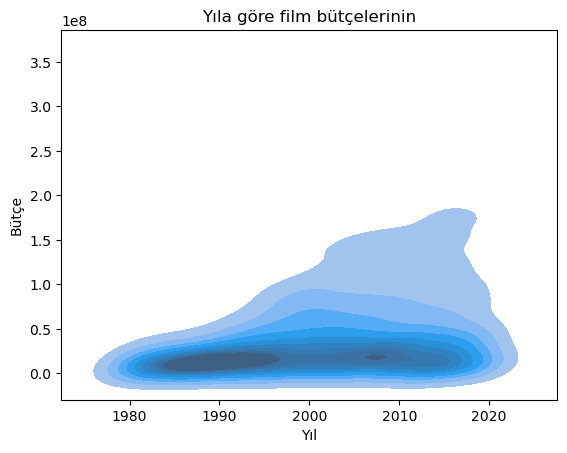

In [104]:
# Yılllara göre film bütçeleri
sns.kdeplot(data=df, x='year',y='budget',fill=True)
plt.xlabel('Yıl')
plt.ylabel('Bütçe')
plt.title('Yıla göre film bütçelerinin')
plt.show()

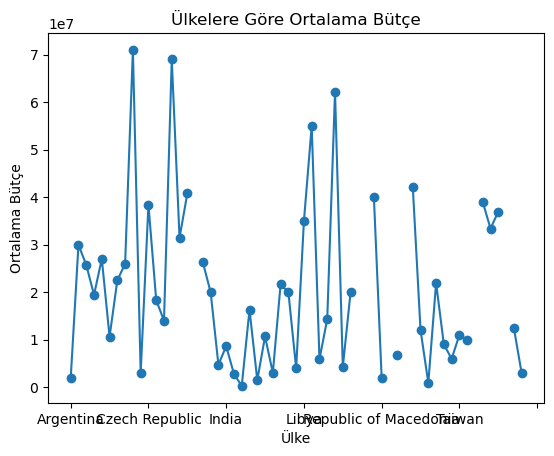

In [105]:
# Ülkenin filmleri ortalama bütçeleri
mean_budget_by_country=df.groupby('country')['budget'].mean()
mean_budget_by_country.plot(marker='o')
plt.xlabel('Ülke')
plt.ylabel('Ortalama Bütçe')
plt.title('Ülkelere Göre Ortalama Bütçe')
plt.show()

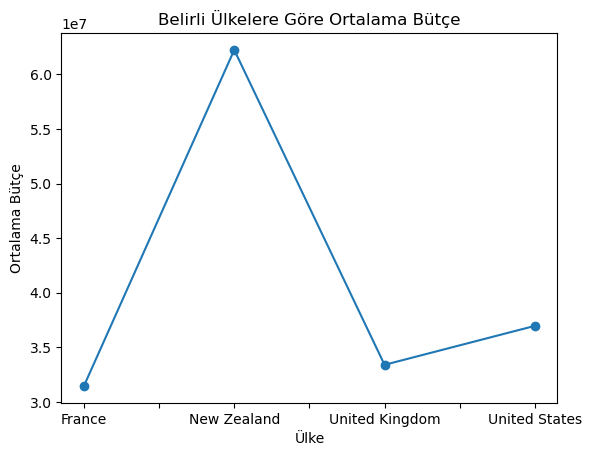

In [106]:
# Göstermek istedim ülkeler
selected_countries = ['United States', 'United Kingdom', 'France', 'New Zealand']

#ülkelerin filmlerini filtreler
df_filtered = df[df['country'].isin(selected_countries)]

# ülkelerin filmlerinin ortalama bütçelerini hesaplar
mean_budget_by_country = df_filtered.groupby('country')['budget'].mean()

# Ortalama bütçeleri grafiğe döker
mean_budget_by_country.plot(marker='o')
plt.xlabel('Ülke')
plt.ylabel('Ortalama Bütçe')
plt.title('Belirli Ülkelere Göre Ortalama Bütçe')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

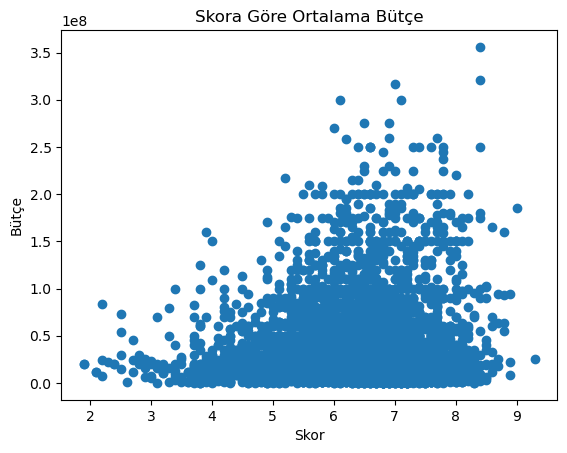

In [107]:
#Scorea göre bütçe

plt.scatter(df['score'],df['budget'])
plt.xlabel('Skor')
plt.ylabel('Bütçe')
plt.title('Skora Göre Ortalama Bütçe')
plt.show

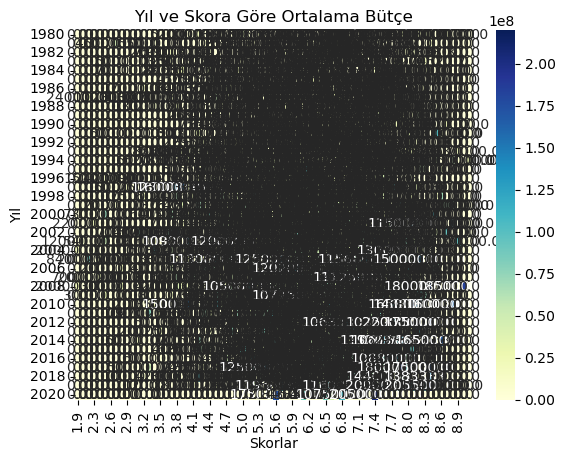

In [108]:
#Yıl ve skora göre ortalama bütçe'nin ısı haritası
pivot_table = df.pivot_table(index='year', columns='score', values='budget', fill_value=0)

# Isı haritası oluşturur
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f', cbar=True)
plt.xlabel('Skorlar')
plt.ylabel('Yıl')
plt.title('Yıl ve Skora Göre Ortalama Bütçe')
plt.show()

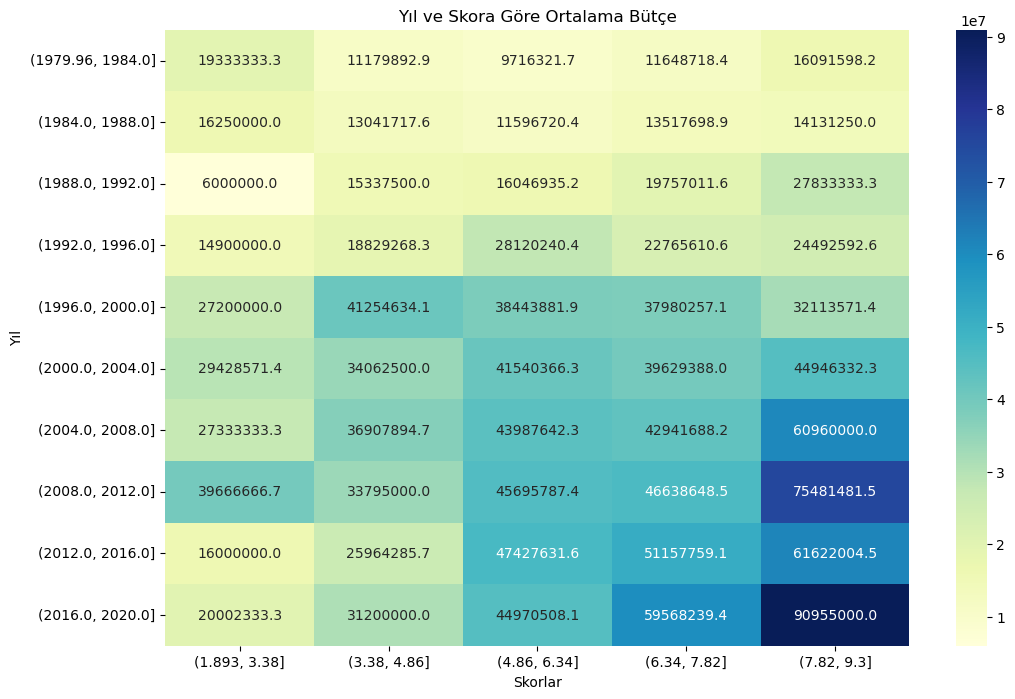

In [109]:
# Yılları ve skorları belirli aralıklara böler
df['year_bin'] = pd.cut(df['year'], bins=10)  # 10 yıllık aralıklar olarak verir 
df['score_bin'] = pd.cut(df['score'], bins=5)  # Skorları 5 aralığa böler

# Yıl ve skora göre ortalama bütçe için pivot tablo oluşturmakta
pivot_table = df.pivot_table(index='year_bin', columns='score_bin', values='budget', aggfunc='mean', fill_value=0)

# Isı haritası oluşturmakta
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f', cbar=True)
plt.xlabel('Skorlar')
plt.ylabel('Yıl')
plt.title('Yıl ve Skora Göre Ortalama Bütçe')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

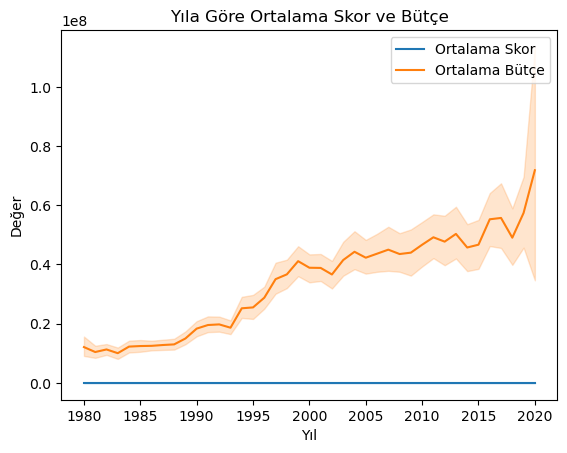

In [110]:
#Ortalama Skor, Ortalama Bütçenin yıllara göre değişimi

sns.lineplot(x='year',y='score',data=df,label='Ortalama Skor')
sns.lineplot(x='year',y='budget',data=df,label='Ortalama Bütçe')
plt.xlabel('Yıl')
plt.ylabel('Değer')
plt.title('Yıla Göre Ortalama Skor ve Bütçe')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

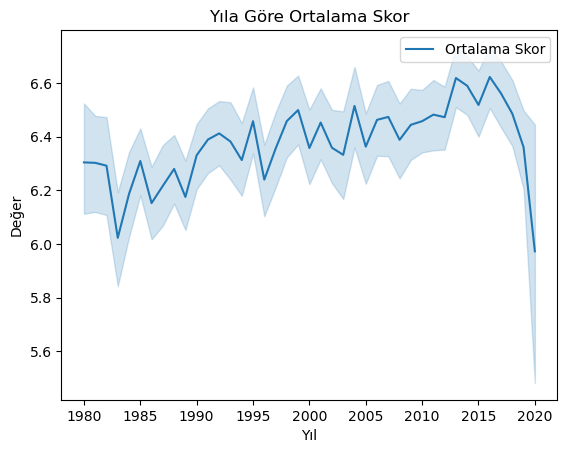

In [111]:
#Ortalama Skor yıllara göre değişimi

sns.lineplot(x='year',y='score',data=df,label='Ortalama Skor')

plt.xlabel('Yıl')
plt.ylabel('Değer')
plt.title('Yıla Göre Ortalama Skor')
plt.legend()
plt.show

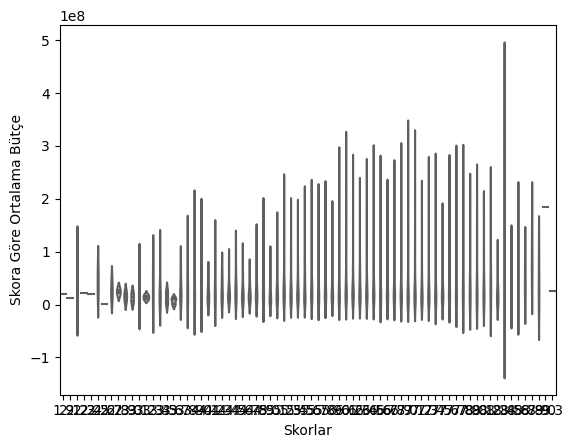

In [112]:
#Skora göre ortalama bütçe grafiği
sns.violinplot(x='score',y='budget',data=df,inner='quartile',palette='Set3')
plt.xlabel('Skorlar')
plt.ylabel('Skora Göre Ortalama Bütçe')
plt.show()

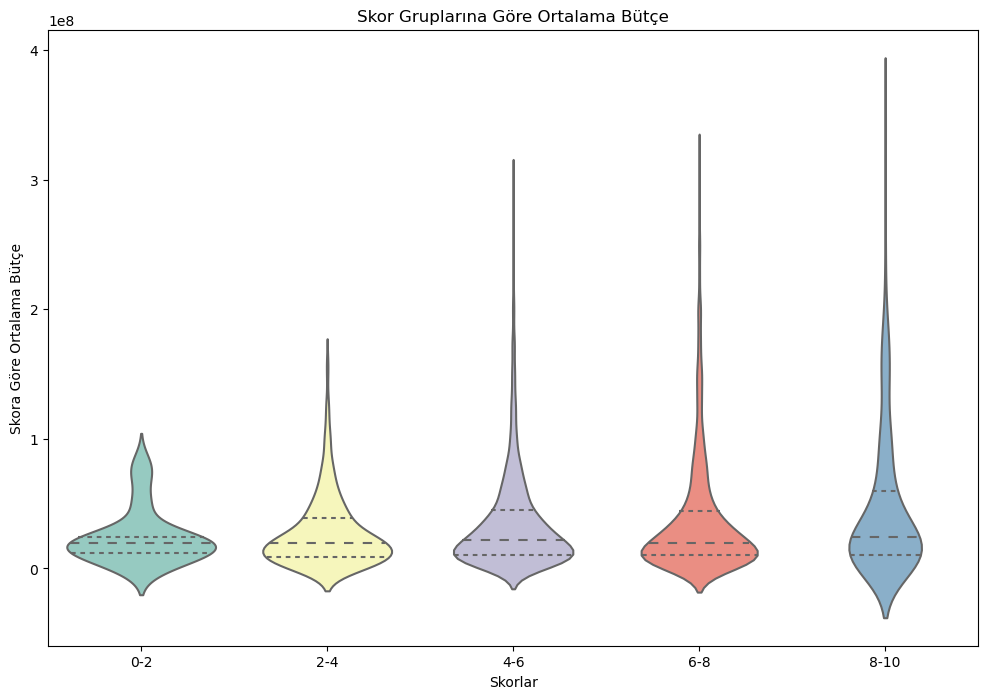

In [113]:
# Skorları belirli aralıklara böler
df['score_bin'] = pd.cut(df['score'], bins=5, labels=['0-2', '2-4', '4-6', '6-8', '8-10'])

# Skora göre ortalama bütçe grafiği (violin plot) oluşturur
plt.figure(figsize=(12, 8))
sns.violinplot(x='score_bin', y='budget', data=df, inner='quartile', palette='Set3')
plt.xlabel('Skorlar')
plt.ylabel('Skora Göre Ortalama Bütçe')
plt.title('Skor Gruplarına Göre Ortalama Bütçe')
plt.show()

C:\Users\berkc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


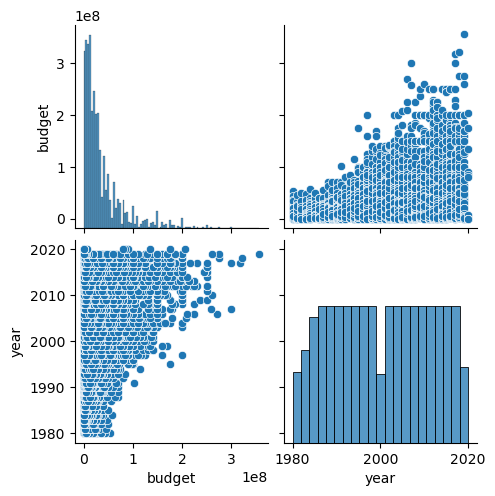

In [114]:
#Bütçenin ve yılın scatteplot matrix'i
sns.pairplot(df[['budget','year']])
plt.show()

In [115]:
# Veri setini yükler
film_data = pd.read_csv("movies.csv")

# Eksik değerleri temizler
film_data = film_data.dropna()

# Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak veriyi ayırır
X = film_data[['year']]
y = film_data['budget']

# Veriyi eğitim ve test kümelerine böler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer regresyon modelini oluşturur
model = LinearRegression()

# Modeli eğitir
model.fit(X_train, y_train)

# Test setini kullanarak tahmin yapar
y_pred = model.predict(X_test)

# Modelin performansını değerlendirir
r2_score = model.score(X_test, y_test)
print("R-Kare skoru:", r2_score)

# Tahmin yap
year_to_predict = [[2030]]  # Tahmin etmek istediğiniz yılı girin
predicted_budget = model.predict(year_to_predict)
print("Tahmin edilen bütçe:", predicted_budget[0])

R-Kare skoru: 0.12054903016081775
Tahmin edilen bütçe: 71023243.85319424


C:\Users\berkc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
